Importing Required Packages

In [1]:
import pandas_datareader.data as reader
import datetime as dt
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats


User Input

In [2]:
print('Enter the Portfolio Value')
port=int(input())
print('Input the number of Stock Tickers')
n=int(input())
stocktickers=[]
for i in range(0,n):
    print('Stock Ticker')
    s=input()
    s=s.upper()
    stocktickers.append(s)

    

Enter the Portfolio Value
1000000
Input the number of Stock Tickers
3
Stock Ticker
aapl
Stock Ticker
tsla
Stock Ticker
msft


Getting the Stock Data

In [3]:
end=dt.datetime.now()
start=dt.datetime(end.year-4,end.month,end.day)
df=reader.get_data_yahoo(stocktickers,start,end)['Adj Close']
returns=df.pct_change()
returns=returns.dropna()

<AxesSubplot:xlabel='Date'>

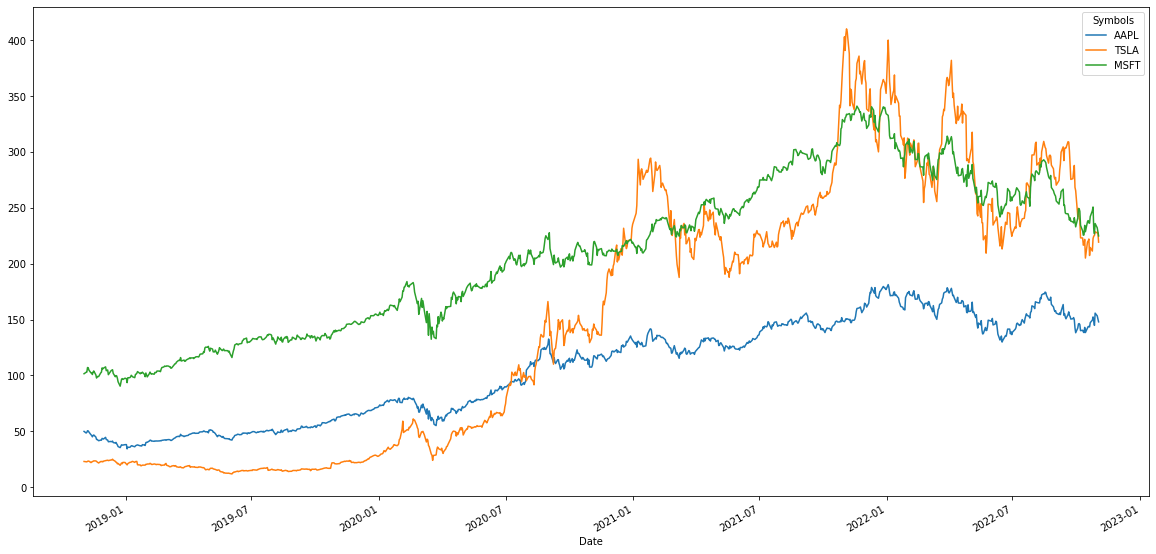

In [4]:
df.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

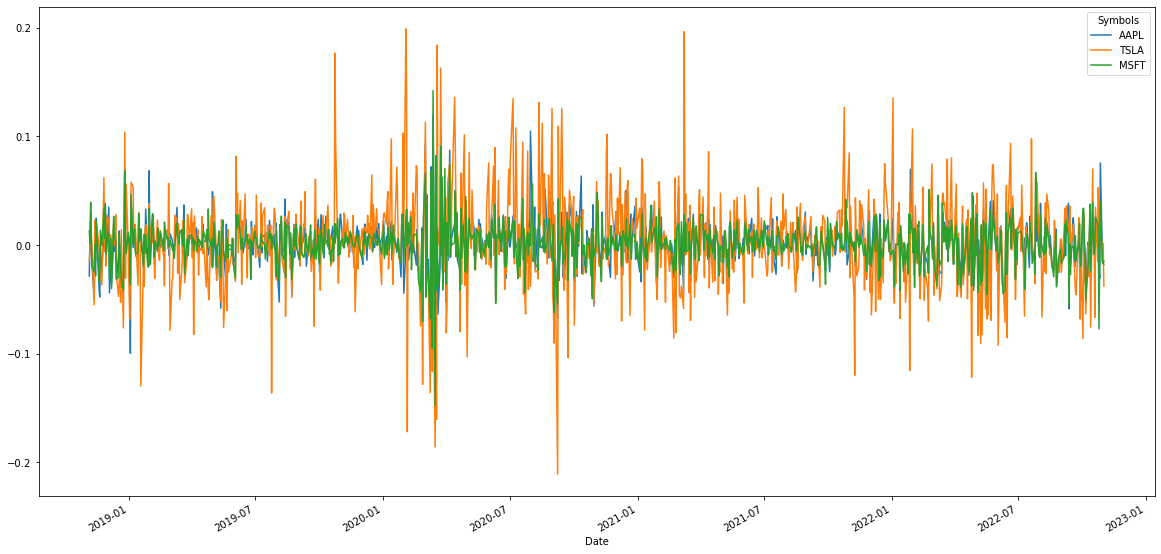

In [5]:
returns.plot(figsize=(20,10))

Expected Returns

In [6]:
d=len(returns)
expret=returns.mean()


Covariance Matrix

In [7]:
covm=returns.cov()
covm

Symbols,AAPL,TSLA,MSFT
Symbols,,,
AAPL,0.000478,0.000451,0.000343
TSLA,0.000451,0.001745,0.000404
MSFT,0.000343,0.000404,0.000399


Efficient Portfolio Calculation

In [8]:
wt=np.linspace(-1,1,10000)
wt = [ round(elem, 3) for elem in wt ]
wp=[]
for i in range(0,10000000):
    t=[]
    p=n-1
    t.append(wt[random.randrange(0,10000)])
    while(p>0):
        t.append(wt[random.randrange(0,10000)])
        p=p-1
    if sum(t)==1:
        wp.append(t)



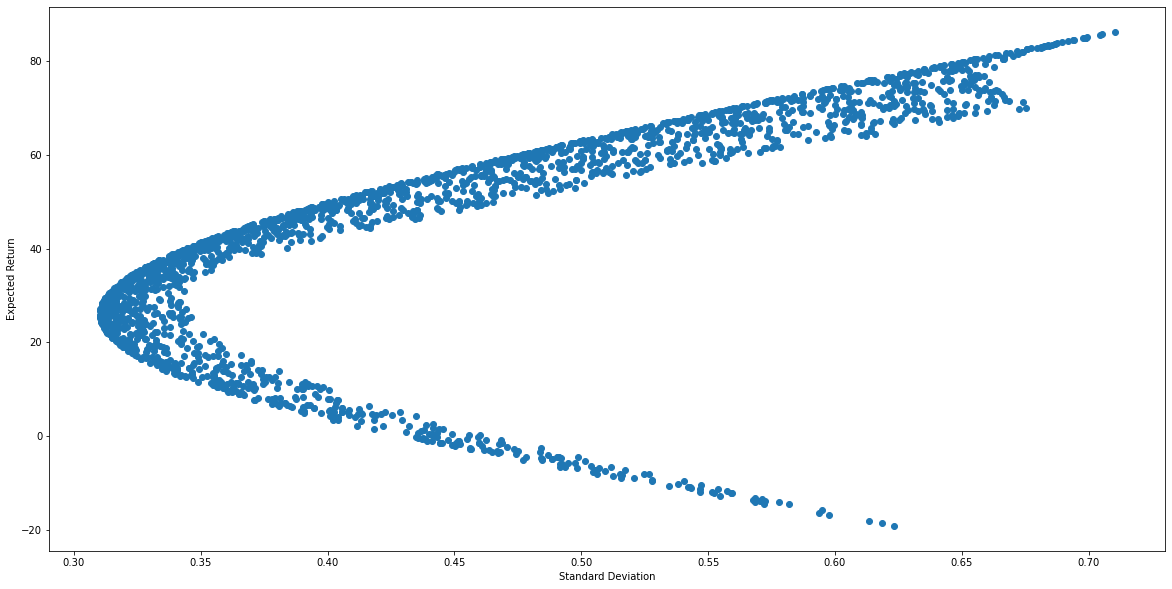

In [9]:
retsh=[]
stdsh=[]
shar=[]
for i in range(0,len(wp)):
    w=wp[i]
    retr=np.sum(w*expret)*252
    std=np.sqrt(np.dot(np.transpose(w),np.dot(covm,w)))*np.sqrt(252)
    riskf=0.04
    sharpe=(retr-riskf)/std
    retsh.append(retr)
    stdsh.append(std)
    shar.append(sharpe)
expretu=np.dot(retsh,100)
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(stdsh,expretu)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
maxs=shar[0]
pos=0
for i in range(0,len(shar)):
    if shar[i]>maxs:
        maxs=shar[i]
        pos=i


In [10]:
pos

535

In [11]:
print('\033[1mAsset Allocation\033[0m')
for i in range(0,n):
    print('%s = %f'%(stocktickers[i],wp[pos][i]))
print('Sharpe Ratio for the Portfolio is %f'%shar[pos])

Asset Allocation
AAPL = 0.678000
TSLA = 0.646000
MSFT = -0.324000
Sharpe Ratio for the Portfolio is 1.179182


Calculation of VAR array for the corresponding Sharpe Ratios

In [12]:
weightedpos=np.dot(wp,port)
end=dt.datetime.now()
start=dt.datetime(end.year-5,end.month,end.day)
df=reader.get_data_yahoo(stocktickers,start,end)['Adj Close']
returns=np.log(1+df.pct_change())
def VaR(Position,sigma,Quantile):
    return Position*sigma*scipy.stats.norm.ppf(Quantile)
d=df.iloc[-1]
vara=[]
for k in range(0,len(weightedpos)):
    Vararray1=[]
    for i in range(len(weightedpos[k])):
        Vararray1.append(VaR(weightedpos[k][i],returns.std()[i],0.99))
    vector1=np.array(Vararray1)
    value1=(np.dot(np.dot(vector1,returns.corr()),vector1))**(1/2)
    vara.append(value1)


Text(0, 0.5, 'Sharpe Ratio')

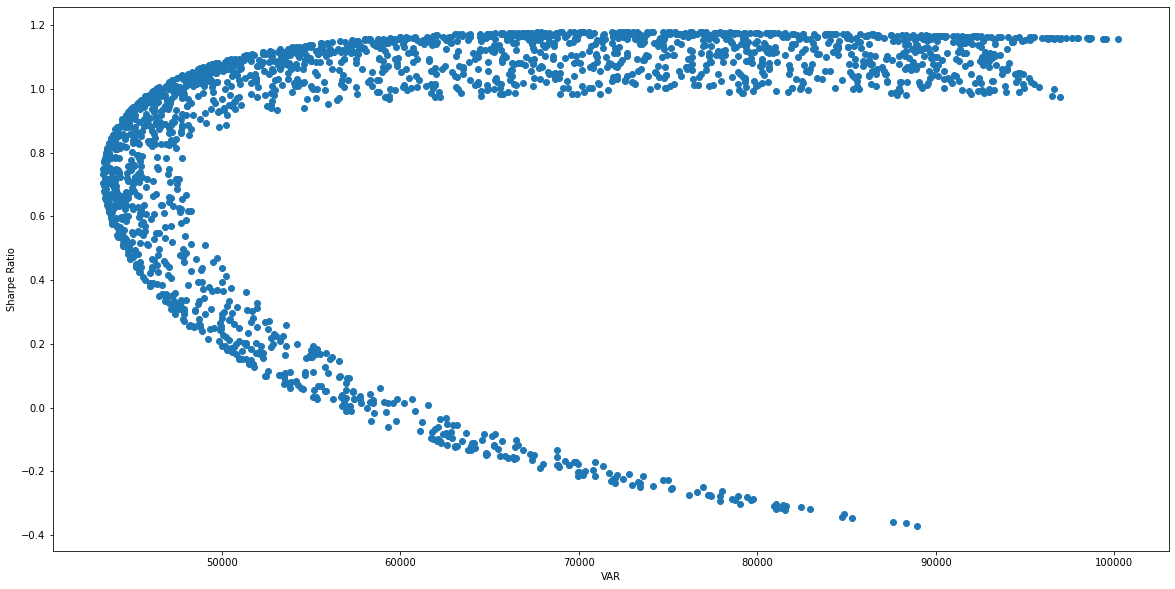

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(vara,shar)
plt.xlabel('VAR')
plt.ylabel('Sharpe Ratio')

Correlation between Sharpe Ratios and VaR

In [14]:
from scipy.stats import pearsonr
corr, _ = pearsonr(shar, vara)
corr

0.3051034468383351

Optimization of Sharpe Ratio and VaR

In [15]:
maxsh=max(shar)
minvar=min(vara)
f=0
pos=0
for i in range(0,len(shar)):
    k=(shar[i]/maxsh)*(minvar/vara[i])
    if k>f:
        f=k
        pos=i

    
    

In [16]:
pos

710

In [17]:
shar[pos] #Sharpe of optimized portfolio

1.0630378797771791

In [18]:
vara[pos] #VaR of optimized portfolio

48641.95024545308

In [19]:
weightedpos[pos] #Portfolio Allocation

array([496000., 226000., 278000.])